# COGS 108 - EDA Checkpoint

# Names

- Gijung Lapeyrouse
- Matthew Gustafson
- Ariel Bastomski
- Andy Chan
- Alexander Dimopoulos

<a id='research_question'></a>
# Research Question

How does one's risk of cardiovascular disease change depending on their lifestyle choices? Are certain regions of the United States more prone to these risks than others, and why might that be?

# Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=1.5)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

Describe your data cleaning steps here.

### Cleaning steps for Dataset #1

In [2]:
# Read the csv file for Dataset #1 and examine a sample
data1 = pd.read_csv('cardiovascular_diseases_dv3.csv')
data1.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


However, by looking at the description of dataset 1 in Kaggle, we get a better idea of what each of the variables are supposed to represent:
- AGE:  integer (years of age)
- HEIGHT: integer (cm) 
- WEIGHT: integer (kg)
- GENDER: categorical (1: female, 2: male)
- AP_HIGH: systolic blood pressure, integer
- AP_LOW: diastolic blood pressure, integer 
- CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)
- GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)
- SMOKE: categorical (0: no, 1: yes)
- ALCOHOL: categorical (0: no, 1: yes)
- PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)
- CARDIO_DISEASE:  categorical (0: no, 1: yes)

We see that AGE, HEIGHT, WEIGHT, and AP_HIGH/AP_LOW are numerical data, while the remaining variables are all categorical data.

In [3]:
# Let's edit the table so categorical values are represented in their plaintext formatting
data1['GENDER'] = data1['GENDER'].replace({1:'female', 2:'male'})
data1['CHOLESTEROL'] = data1['CHOLESTEROL'].replace({1:'normal', 2:'above normal', 3:'well above normal'})
data1['GLUCOSE'] = data1['GLUCOSE'].replace({1:'normal', 2:'above normal', 3:'well above normal'})
data1['SMOKE'] = data1['SMOKE'].replace({0:'no', 1:'yes'})
data1['ALCOHOL'] = data1['ALCOHOL'].replace({0:'no', 1:'yes'})
data1['PHYSICAL_ACTIVITY'] = data1['PHYSICAL_ACTIVITY'].replace({0:'no', 1:'yes'})
data1['CARDIO_DISEASE'] = data1['CARDIO_DISEASE'].replace({0:'no', 1:'yes'})

In [4]:
# Examine the dataset with renamed categorical values
data1.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,male,168,62,110,80,normal,normal,no,no,yes,no
1,55,female,156,85,140,90,well above normal,normal,no,no,yes,yes
2,52,female,165,64,130,70,well above normal,normal,no,no,no,yes
3,48,male,169,82,150,100,normal,normal,no,no,yes,yes
4,48,female,156,56,100,60,normal,normal,no,no,no,no


### Cleaning steps for Dataset #2

In [5]:
# Read the csv file for Dataset #2
data = pd.read_csv('500_Cities__Coronary_heart_disease_among_adults_aged___18_years.csv')

# Include only cities and age-adjusted prevalence rates for observations
data = data[(data['GeographicLevel'] == 'City') & (data['DataValueTypeID'] == 'AgeAdjPrv')]

# Include only the necessary columns for analysis
data_trimmed = data[['Year', 'StateAbbr', 'StateDesc', 'CityName', 'Measure', 'Data_Value_Unit', 'Data_Value_Type', 
                     'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'PopulationCount']].reset_index()

In [6]:
# Display sample from Dataset #2
data_trimmed.head()

,index,Year,StateAbbr,StateDesc,CityName,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
0,0,2017,CA,California,Hayward,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,4.8,4.7,4.8,144186
1,4,2017,CA,California,Bellflower,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,5.3,5.2,5.4,76616
2,9,2017,FL,Florida,Cape Coral,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,6.3,6.2,6.4,154305
3,16,2017,KS,Kansas,Kansas City,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,7.1,7.0,7.1,145786
4,28,2017,OH,Ohio,Parma,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,6.0,5.8,6.1,81601


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section:
- What distributions do your variables take?
- Are there any outliers?
- Relationship between variables?

# 1.) Question
# There are several associations we would like to explore in our datasets:
# a) Can we distinguish any connections between state and having a higher rate of coronary heart disease?
# b)

In [7]:
# Examining the format of dataset 1
print('Shape: ')
print(data1.shape)
print(f'\n')

print('Types:')
print(data1.dtypes)
print(f'\n')

Shape: 
(68783, 12)


Types:
AGE                   int64
GENDER               object
HEIGHT                int64
WEIGHT                int64
AP_HIGH               int64
AP_LOW                int64
CHOLESTEROL          object
GLUCOSE              object
SMOKE                object
ALCOHOL              object
PHYSICAL_ACTIVITY    object
CARDIO_DISEASE       object
dtype: object




In [8]:
# Let's get an idea of how many people fall into each category for the categorical variables in our dataset
print("Gender Distribution:")
print(data1['GENDER'].value_counts())
print(f'\n')
#sns.countplot(x='CHOLESTEROL', )

print("Cholesterol Levels Distribution:")
print(data1['CHOLESTEROL'].value_counts())
print(f'\n')

print("Glucose Levels Distribution:")
print(data1['GLUCOSE'].value_counts())
print(f'\n')

print("Smoker Distribution:")
print(data1['SMOKE'].value_counts())
print(f'\n')

print("Alcohol Drinker Distribution:")
print(data1['ALCOHOL'].value_counts())
print(f'\n')

print("Physically Active Distribution:")
print(data1['PHYSICAL_ACTIVITY'].value_counts())
print(f'\n')

print("Cardio Disease Distribution:")
print(data1['CARDIO_DISEASE'].value_counts())
print(f'\n')

Gender Distribution:
female    44795
male      23988
Name: GENDER, dtype: int64


Cholesterol Levels Distribution:
normal               51582
above normal          9315
well above normal     7886
Name: CHOLESTEROL, dtype: int64


Glucose Levels Distribution:
normal               58474
well above normal     5235
above normal          5074
Name: GLUCOSE, dtype: int64


Smoker Distribution:
no     62730
yes     6053
Name: SMOKE, dtype: int64


Alcohol Drinker Distribution:
no     65094
yes     3689
Name: ALCOHOL, dtype: int64


Physically Active Distribution:
yes    55258
no     13525
Name: PHYSICAL_ACTIVITY, dtype: int64


Cardio Disease Distribution:
no     34742
yes    34041
Name: CARDIO_DISEASE, dtype: int64




In [9]:
# 2.) First lets get a general idea of the format of our data

df = data_trimmed

print('Shape: ')
print(df.shape)
print(f'\n')

print('Types:')
print(df.dtypes)
print(f'\n')

print('Value Counts: ')
print(df['StateAbbr'].value_counts())
print(f'\n')

print('Hearth value above 8:')
print(df[df['Data_Value'] > 8])
print(f'\n')

df.describe()

Shape: 
(500, 12)


Types:
index                      int64
Year                       int64
StateAbbr                 object
StateDesc                 object
CityName                  object
Measure                   object
Data_Value_Unit           object
Data_Value_Type           object
Data_Value               float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
PopulationCount            int64
dtype: object


Value Counts: 
CA    121
TX     47
FL     33
IL     18
MI     16
CO     14
NC     14
WA     14
MA     13
AZ     12
VA     11
GA     11
IN     11
NY      9
OH      9
NJ      9
UT      9
CT      8
OR      8
MO      8
PA      7
WI      7
MN      7
AL      6
KS      6
LA      6
TN      6
OK      6
IA      6
SC      5
AR      5
NV      5
RI      4
NM      4
ID      3
NH      2
NE      2
KY      2
MT      2
SD      2
MS      2
ME      1
HI      1
DE      1
DC      1
MD      1
AK      1
WY      1
WV      1
VT      1
ND      1
Name: StateAbbr, dtype: int64


Hear

,index,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
count,500.000000,500.0,500.000000,500.000000,500.000000,5.000000e+02
mean,13582.928000,2017.0,5.676000,5.573000,5.782000,2.060416e+05
std,8768.474475,0.0,1.016174,1.009619,1.018937,4.574810e+05
min,0.000000,2017.0,3.500000,3.400000,3.600000,4.241700e+04
25%,6550.000000,2017.0,4.900000,4.800000,5.000000,8.159000e+04
50%,12525.000000,2017.0,5.700000,5.600000,5.800000,1.061060e+05
75%,21656.500000,2017.0,6.400000,6.300000,6.500000,1.811278e+05
max,28998.000000,2017.0,8.800000,8.700000,8.900000,8.175133e+06


In [ ]:
index', 'Year', '', 'StateDesc', 'CityName', 'Measure',
       'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'PopulationCount

# From this analysis we can see that a majority of the patients are from CA, TX, and FL. We also see that that the average data value for coronary heart disease is about 5.7, with the lowest at 3.5 and a maximum of 8.8.

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Average % Coronary Heart Disease'),
 Text(0.5, 1.0, 'Average percentage of coronary heart disease per state across all cities')]

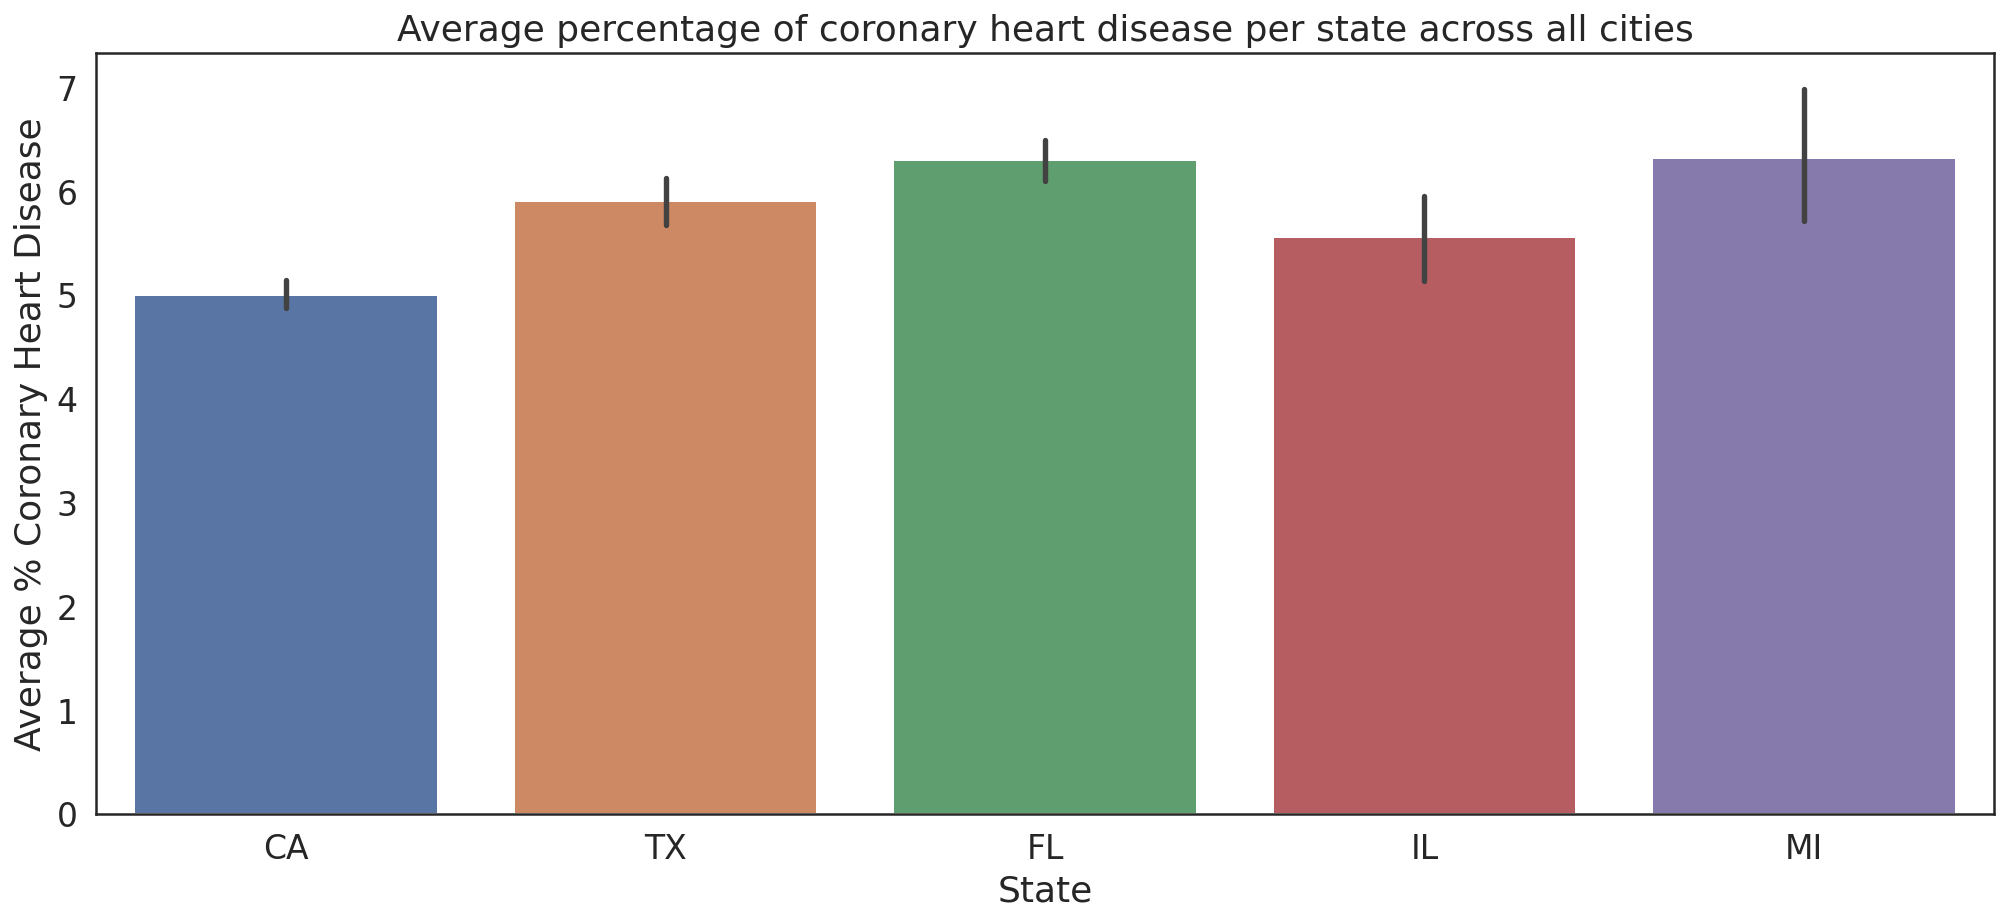

In [10]:
# 3.) Visualize statistics about these variables
ax = sns.barplot(x="StateAbbr", y="Data_Value", data=df, order=df.StateAbbr.value_counts().iloc[:5].index)
ax.set(xlabel='State', ylabel='Average % Coronary Heart Disease', title='Average percentage of coronary heart disease per state across all cities')



# Based on the results above, it looks like MI, FL, and TX have the highest average rate of coronary heart disease in the US.

# Question: Correlation between habits (Smoking, Alcohol, Physical activity) and coronary heart disease?

In [11]:
df2 = pd.read_csv('cardiovascular_diseases_dv3.csv')
df3 = data1

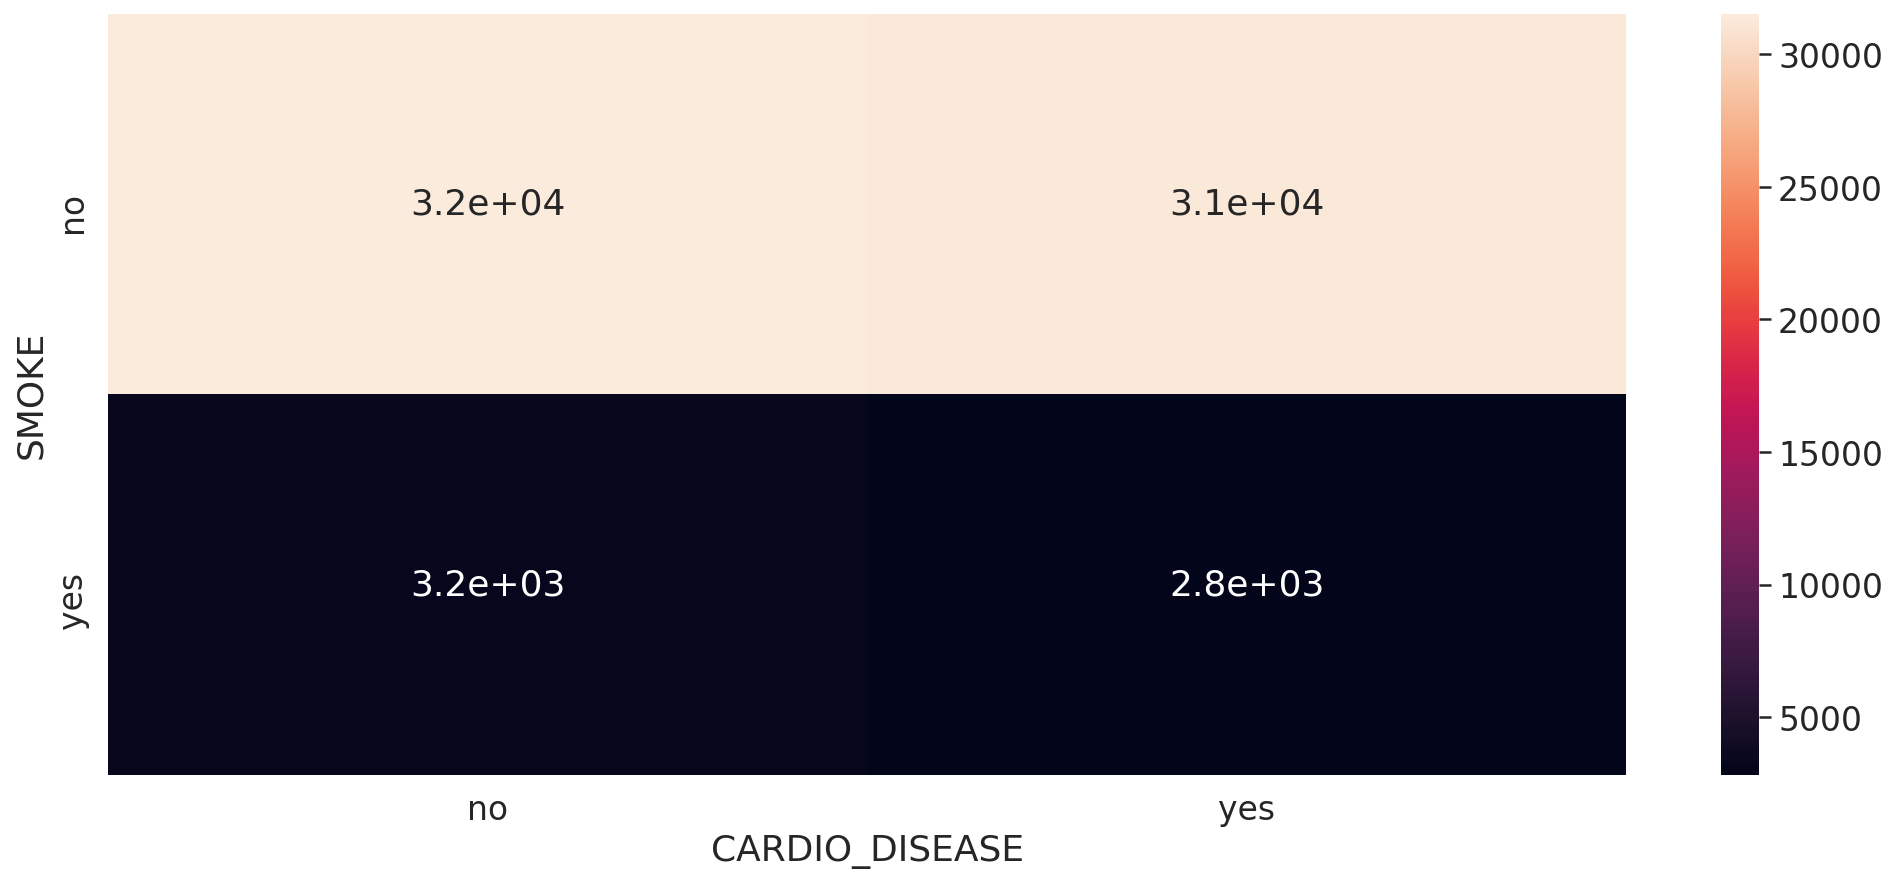

In [12]:
confusion_matrix = pd.crosstab(df3['SMOKE'], df3['CARDIO_DISEASE'], rownames=['SMOKE'], colnames=['CARDIO_DISEASE'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

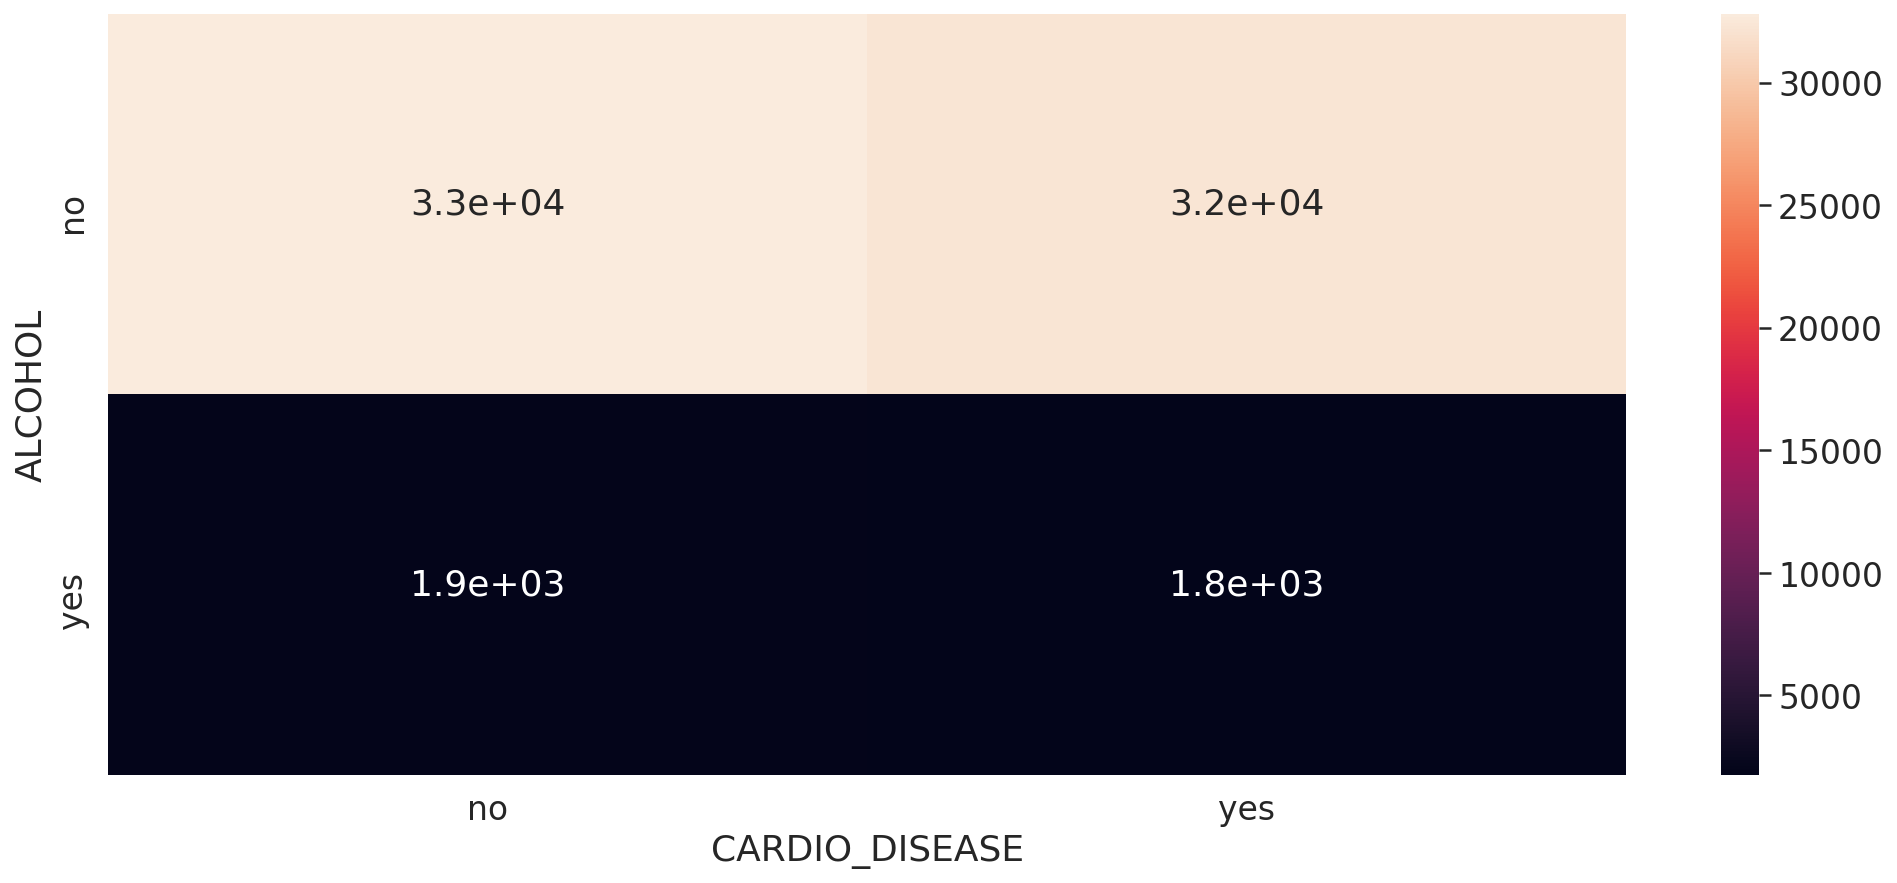

In [13]:
confusion_matrix = pd.crosstab(df3['ALCOHOL'], df3['CARDIO_DISEASE'], rownames=['ALCOHOL'], colnames=['CARDIO_DISEASE'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

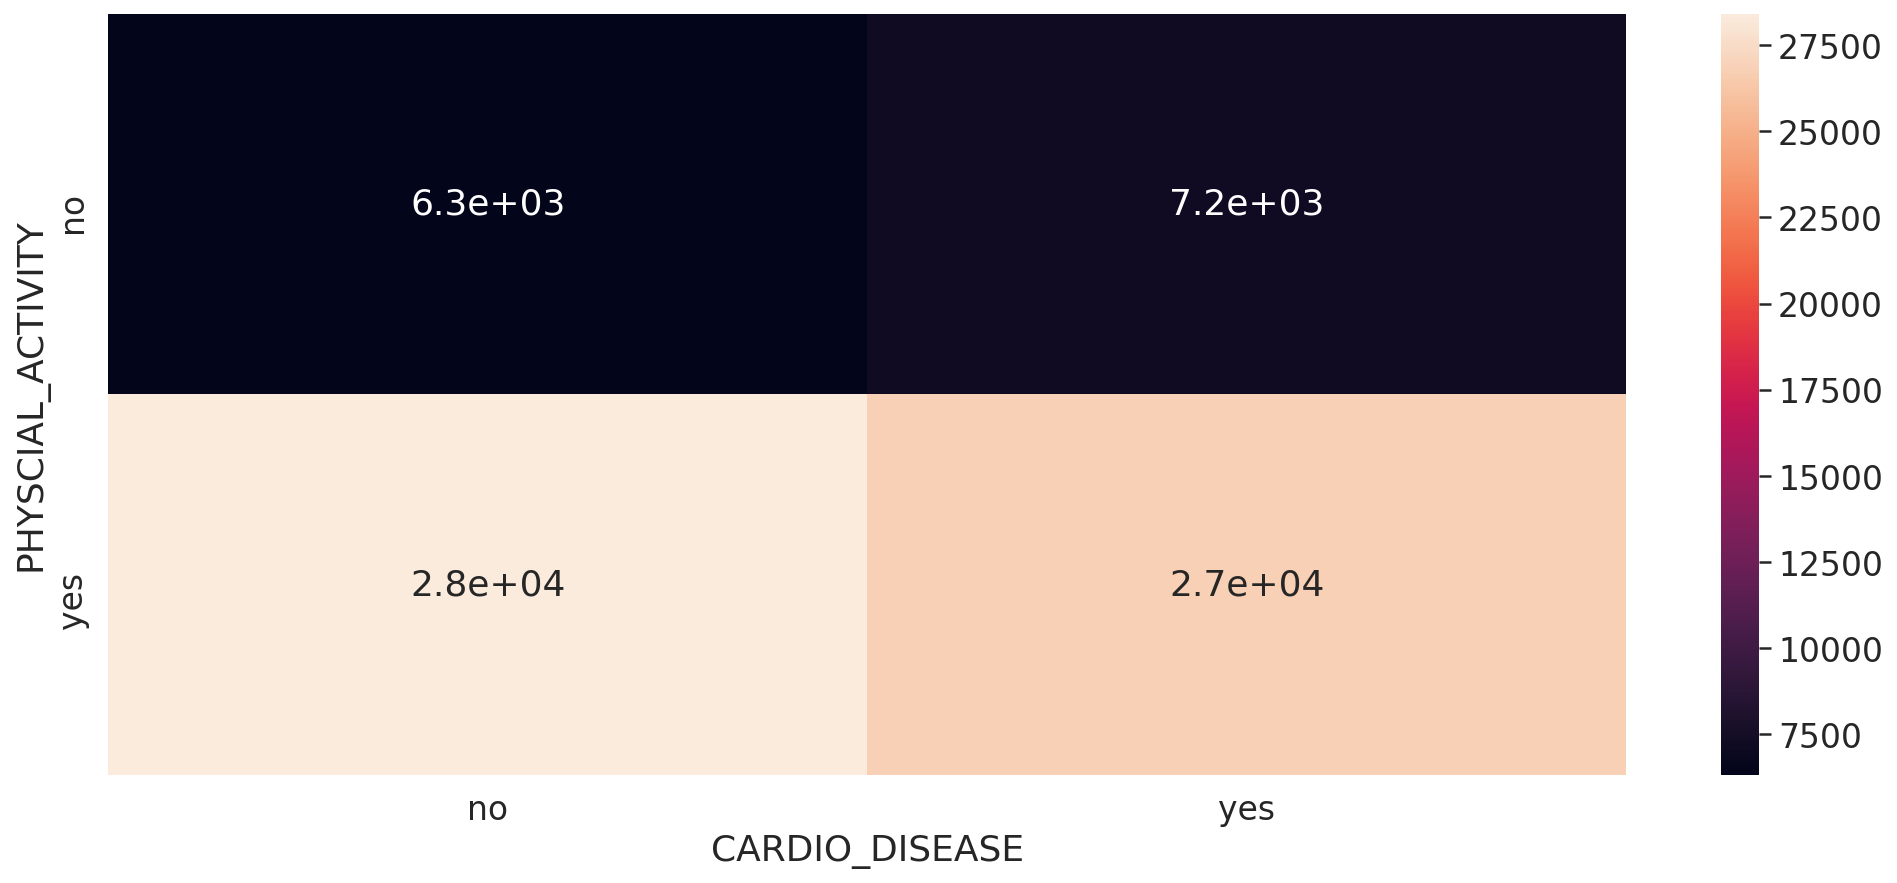

In [14]:
confusion_matrix = pd.crosstab(df3['PHYSICAL_ACTIVITY'], df3['CARDIO_DISEASE'], rownames=['PHYSCIAL_ACTIVITY'], colnames=['CARDIO_DISEASE'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

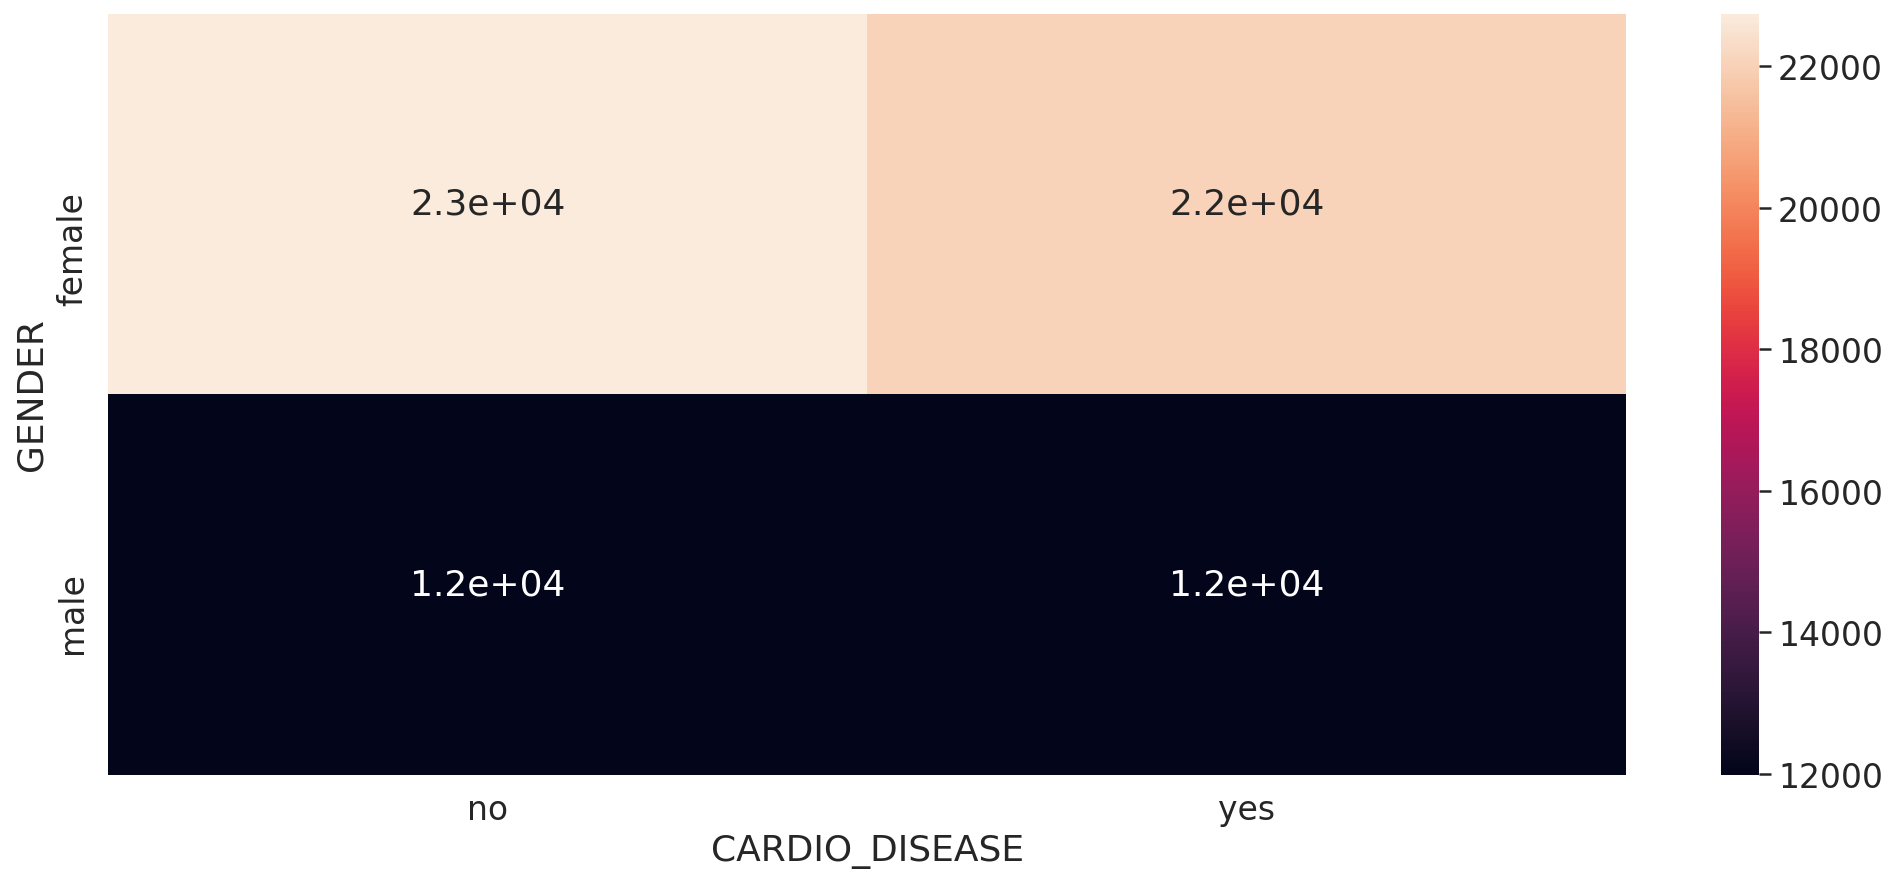

In [15]:
confusion_matrix = pd.crosstab(df3['GENDER'], df3['CARDIO_DISEASE'], rownames=['GENDER'], colnames=['CARDIO_DISEASE'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

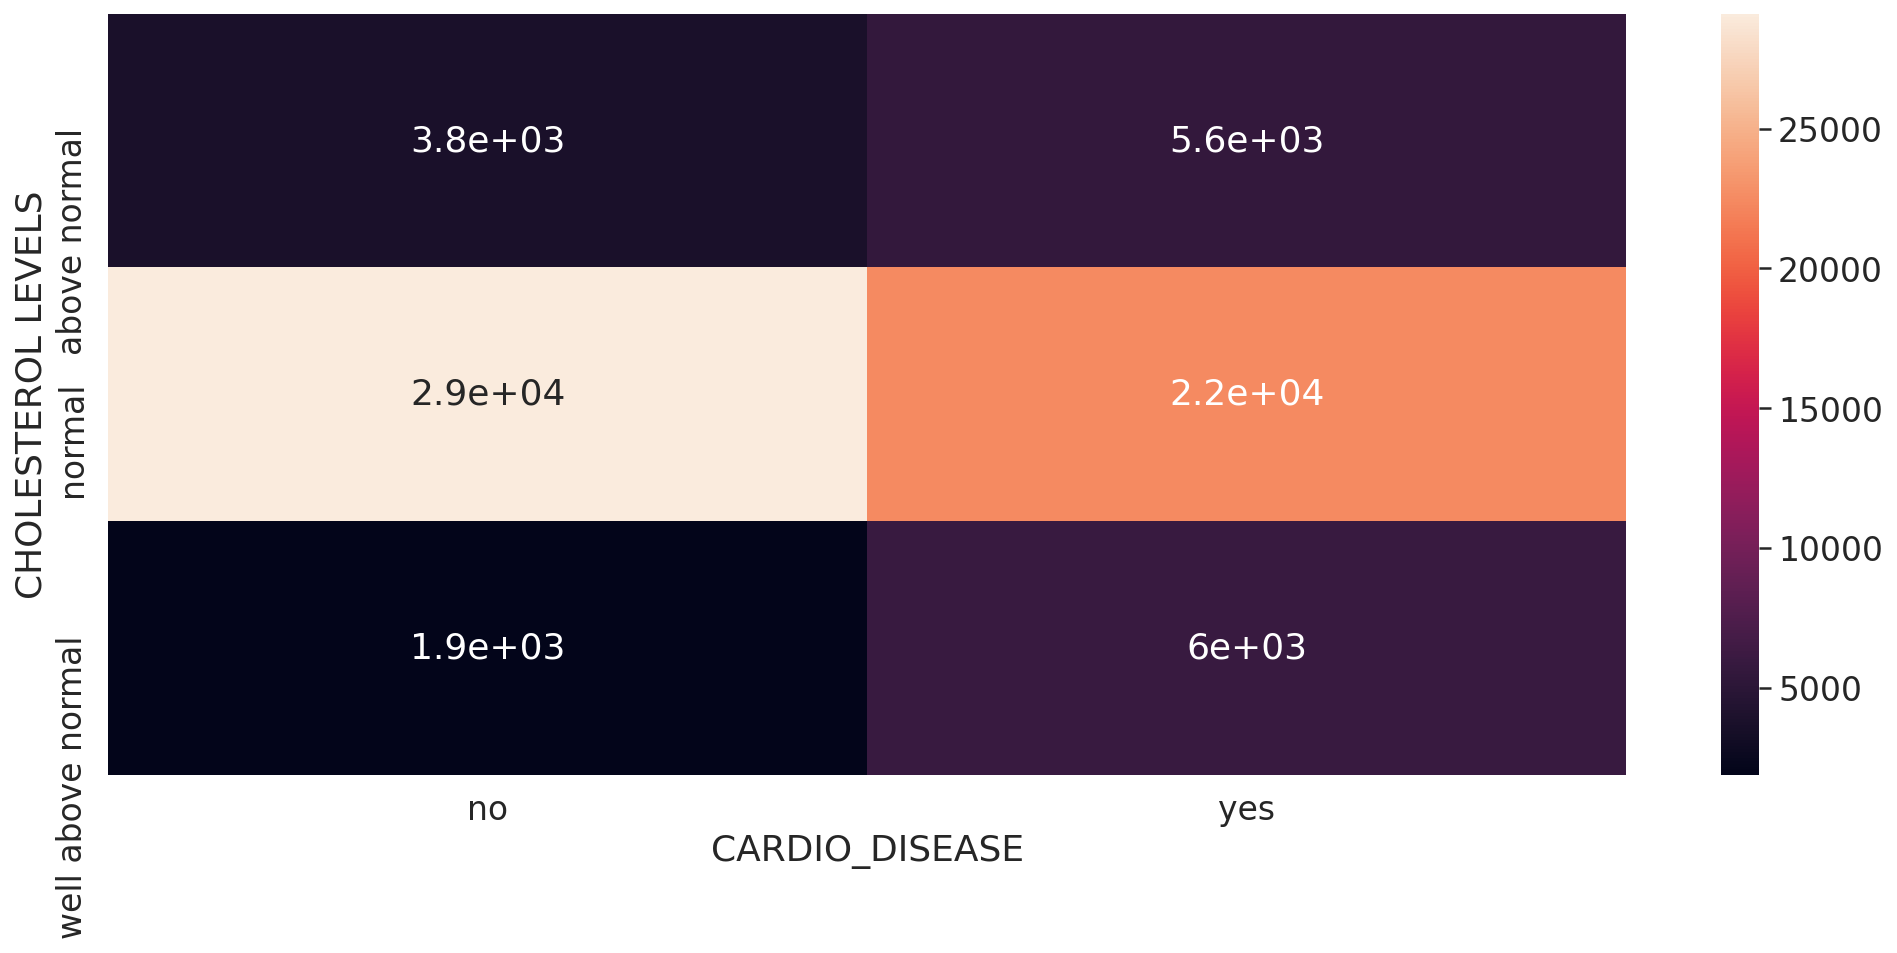

In [16]:
confusion_matrix = pd.crosstab(df3['CHOLESTEROL'], df3['CARDIO_DISEASE'], rownames=['CHOLESTEROL LEVELS'], colnames=['CARDIO_DISEASE'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

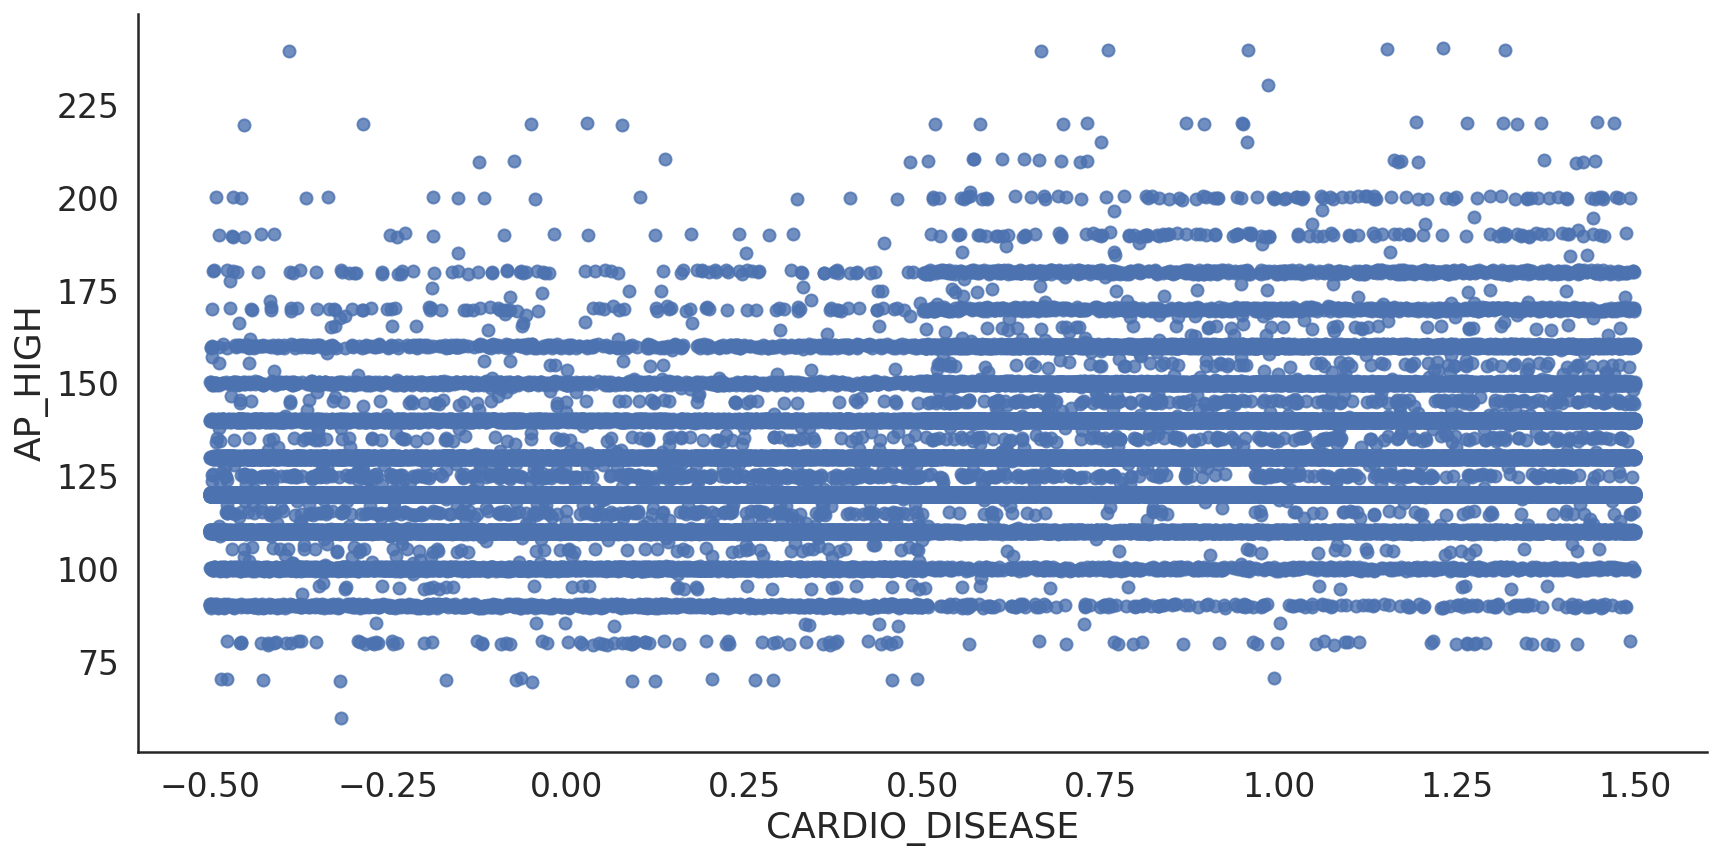

In [17]:
# scatterplot
sns.lmplot(x='CARDIO_DISEASE', y='AP_HIGH', 
           data=df2, fit_reg=False, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

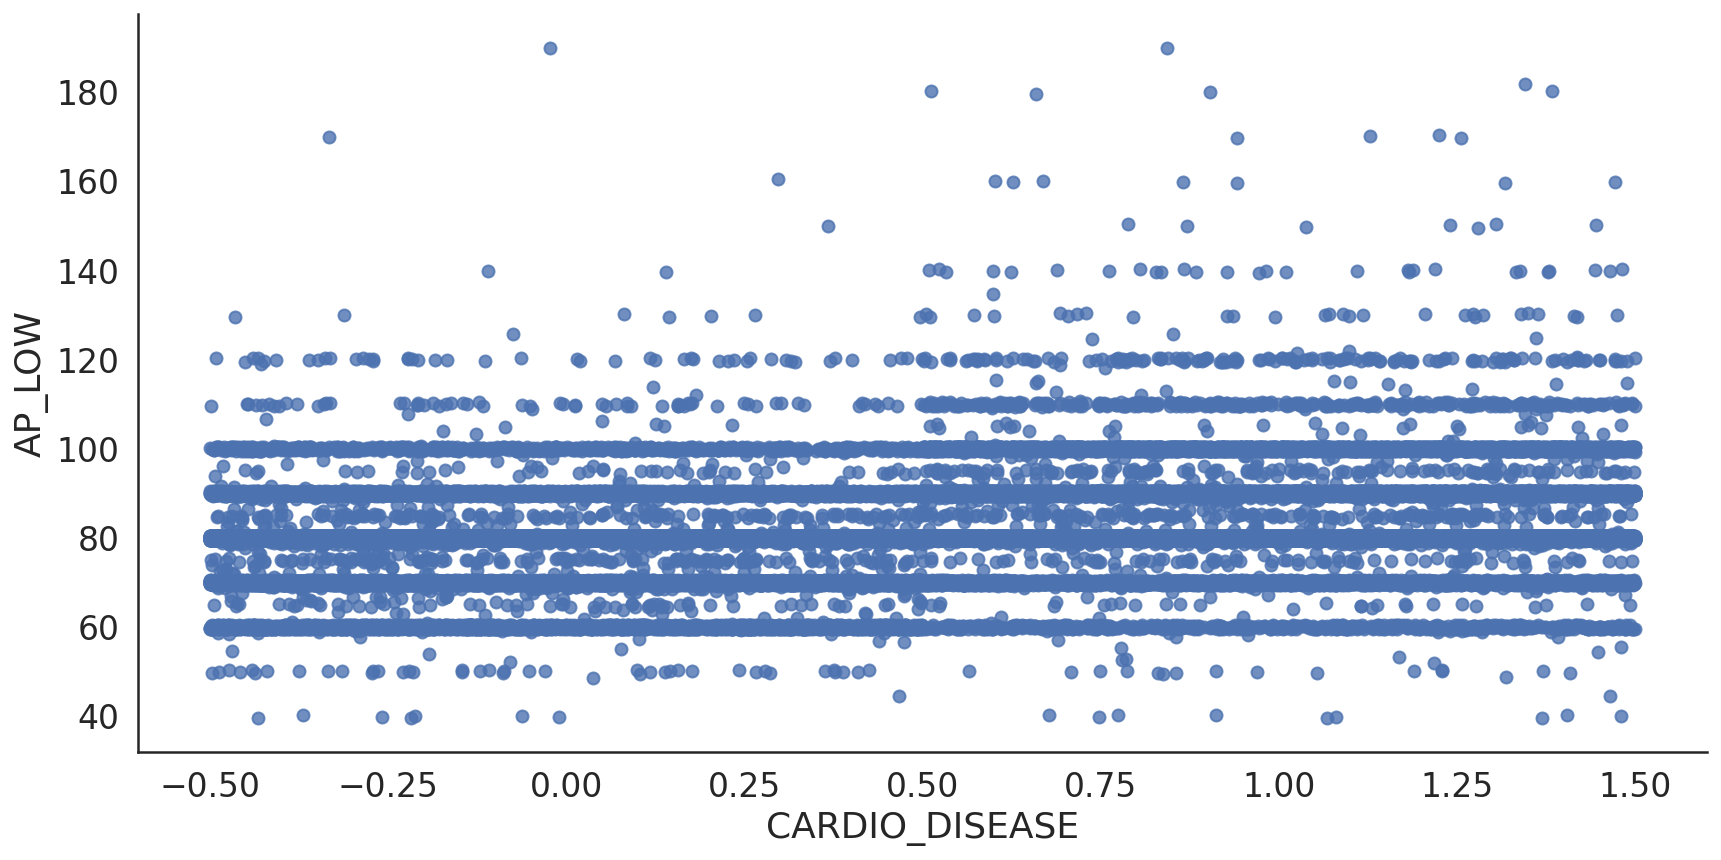

In [20]:
sns.lmplot(x='CARDIO_DISEASE', y='AP_LOW', 
           data=df2, fit_reg=False, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

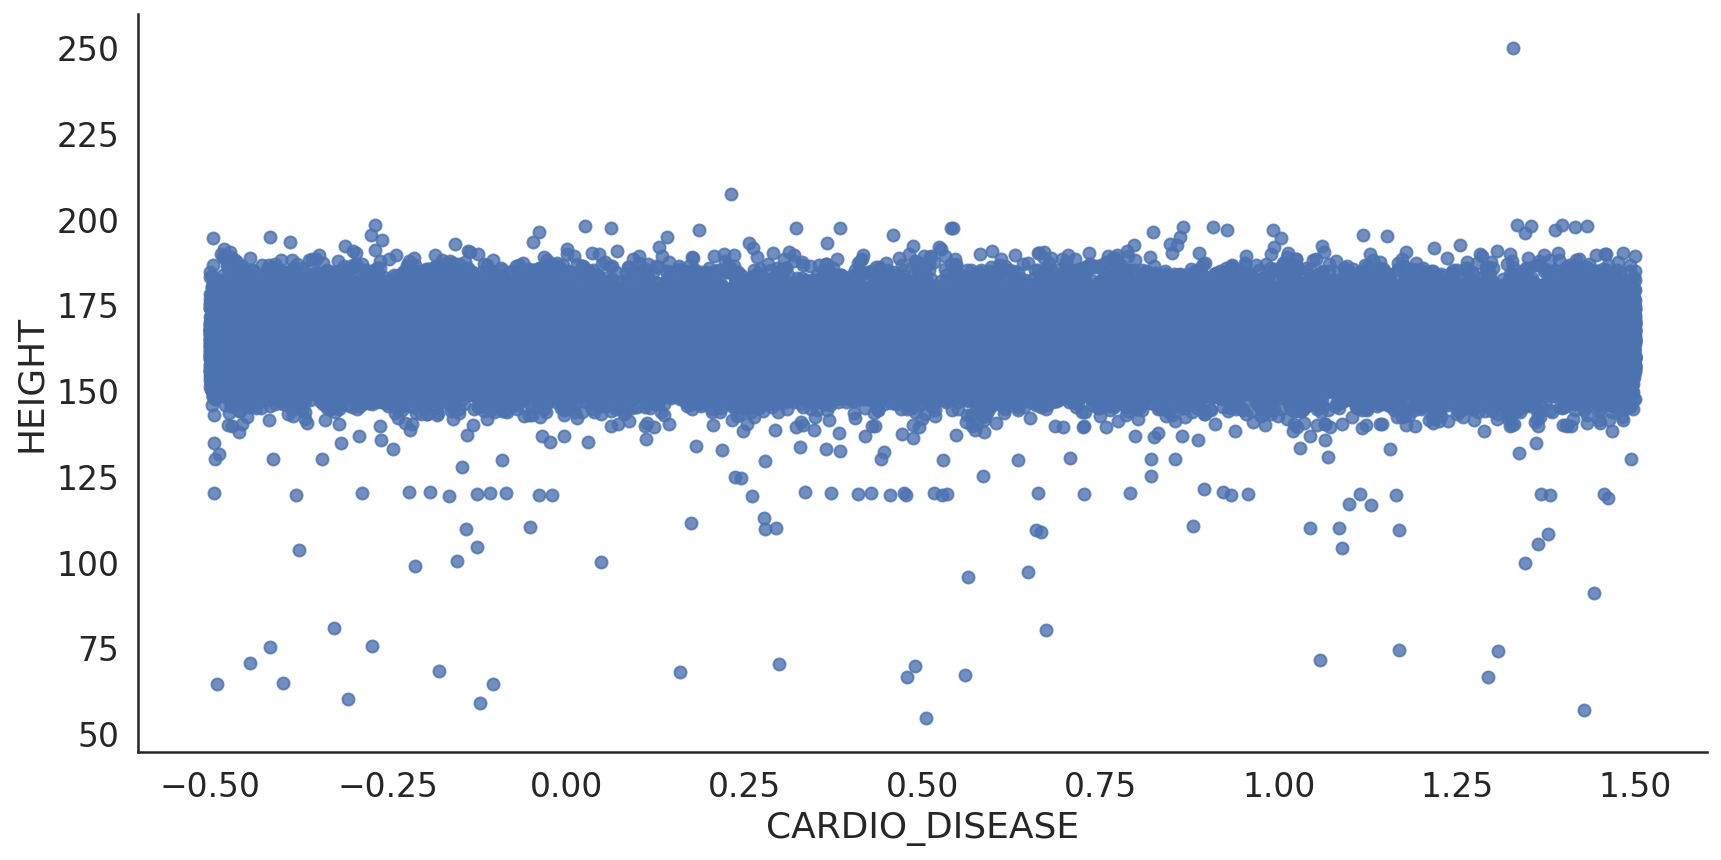

In [18]:
# scatterplot
sns.lmplot(x='CARDIO_DISEASE', y='HEIGHT', 
           data=df2, fit_reg=False, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

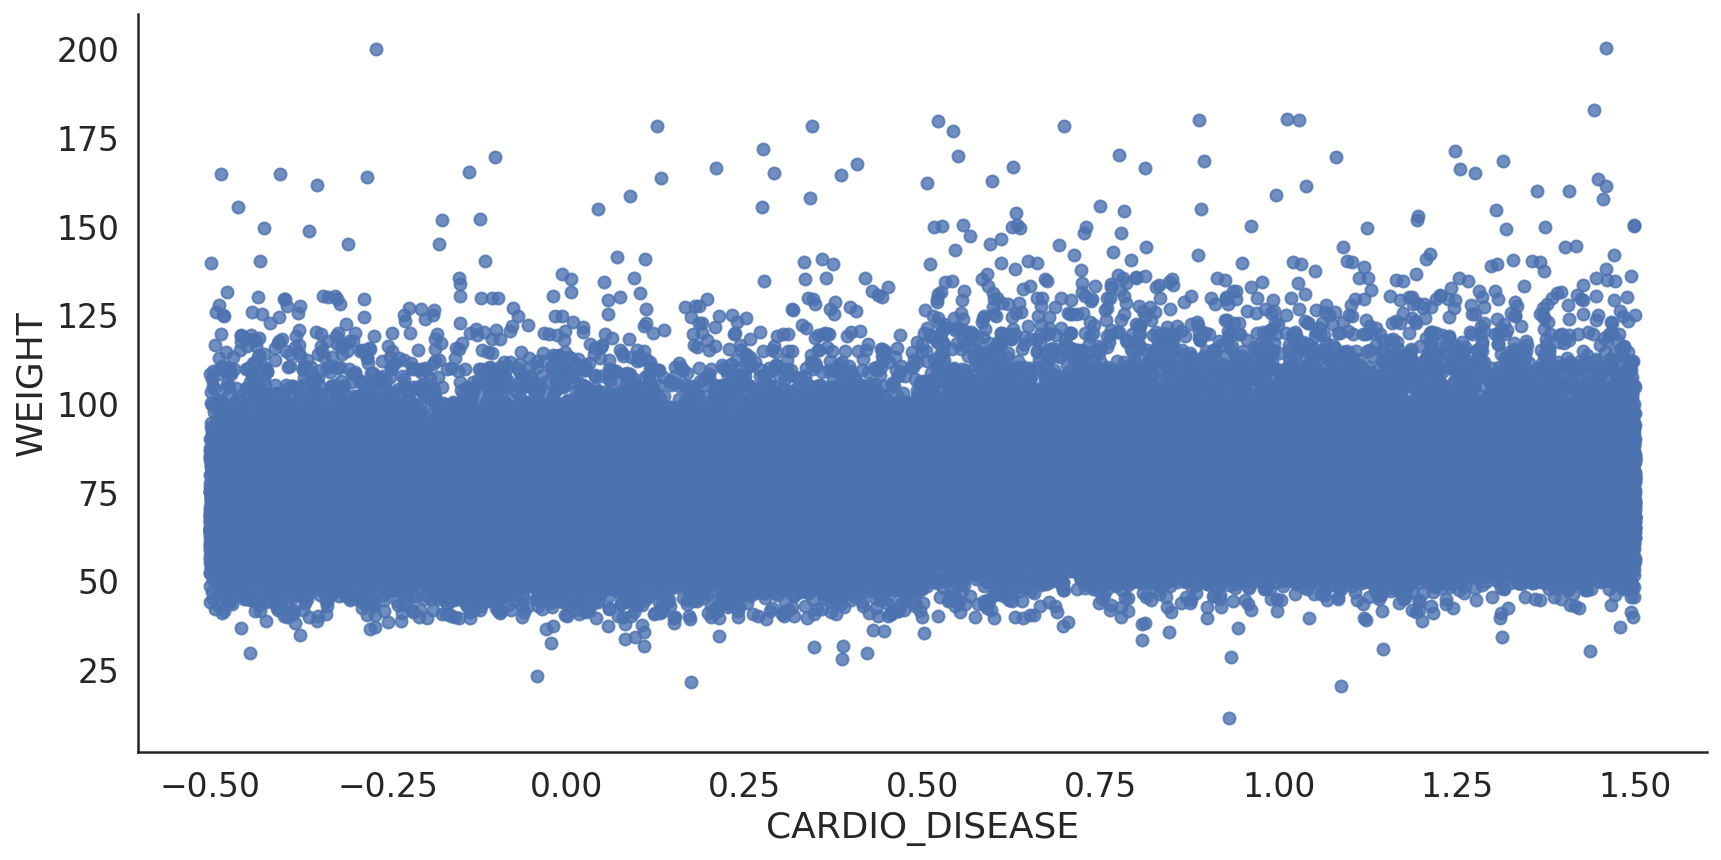

In [19]:
# scatterplot
sns.lmplot(x='CARDIO_DISEASE', y='WEIGHT', 
           data=df2, fit_reg=False, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

# From the visuals above, we can see that there aren't many clear relationships between the variables in dataset1 and cardiovascular disease. This could be due to the samples in the data and lack of variability from the sample size. We see that the the only clear relationship found between cardiovascular disease and these variables is cholesterol levels. And that those with above normal levels have a much higher chance to have cardiovascular problems than those with normal levels. 